## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros_mob_home.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 33 columns):
DAMAGE_PROPERTY       8230 non-null float64
DURATION_SECONDS      8230 non-null float64
BEGIN_LAT             8230 non-null float64
BEGIN_LON             8230 non-null float64
TOR_LENGTH            8230 non-null float64
TOR_WIDTH             8230 non-null float64
YEAR                  8230 non-null float64
OPEN_WATER_PROP       8230 non-null float64
DEV_OPEN_PROP         8230 non-null float64
DEV_LOW_PROP          8230 non-null float64
DEV_MED_PROP          8230 non-null float64
DEV_HIGH_PROP         8230 non-null float64
DECID_FOREST_PROP     8230 non-null float64
EVERGR_FOREST_PROP    8230 non-null float64
MIXED_FOREST_PROP     8230 non-null float64
SHRUB_SCRUB_PROP      8230 non-null float64
GRASS_LAND_PROP       8230 non-null float64
PASTURE_HAY_PROP      8230 non-null float64
CULT_CROPS_PROP       8230 non-null float64
WOOD_WETLAND_PROP     8230 non-null float64
HERB_WETLAND_

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 1 columns):
DAMAGE_PROPERTY    8230 non-null float64
dtypes: float64(1)
memory usage: 64.4 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 2:]


# Get rid of non-location and non-landcover variables
tornado_features = tornado_features.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "YEAR",
                                          "TOR_AREA",
                                          "EXP_INC_AREA",
                                          "DAY_OF_YEAR",
                                          "MONTH_MEAN",
                                          "TIME"],
                                         axis = 1)


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 23 columns):
BEGIN_LAT             8230 non-null float64
BEGIN_LON             8230 non-null float64
OPEN_WATER_PROP       8230 non-null float64
DEV_OPEN_PROP         8230 non-null float64
DEV_LOW_PROP          8230 non-null float64
DEV_MED_PROP          8230 non-null float64
DEV_HIGH_PROP         8230 non-null float64
DECID_FOREST_PROP     8230 non-null float64
EVERGR_FOREST_PROP    8230 non-null float64
MIXED_FOREST_PROP     8230 non-null float64
SHRUB_SCRUB_PROP      8230 non-null float64
GRASS_LAND_PROP       8230 non-null float64
PASTURE_HAY_PROP      8230 non-null float64
CULT_CROPS_PROP       8230 non-null float64
WOOD_WETLAND_PROP     8230 non-null float64
HERB_WETLAND_PROP     8230 non-null float64
BARREN_LAND_PROP      8230 non-null float64
INCOME                8230 non-null float64
TOT_DEV_INT           8230 non-null float64
TOT_WOOD_AREA         8230 non-null float64
WOOD_DEV_INT 

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.7085
 0.5805
 0.7085
   ⋮    
 0.9397
 0.9644
 0.7085
[torch.DoubleTensor of size 8230x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


-3.7157e-01  6.1740e-01 -1.2135e+00  ...   5.0574e-01 -2.2737e+00  8.5283e-01
-9.3529e-01  1.1152e+00 -1.2134e+00  ...  -2.9015e-02  5.2475e-02  8.4258e-01
 1.8028e-01  8.2261e-01  1.4336e-01  ...   9.4487e-01  5.2025e-01  2.1240e-01
                ...                   ⋱                   ...                
-1.9908e+00  1.1802e+00 -1.0379e+00  ...   6.5473e-01  2.6493e-01  1.7873e+00
 3.0892e-01  5.3075e-01 -1.8447e-01  ...  -8.6400e-02  6.6162e-01  1.0947e+00
-1.4187e+00 -8.0176e-02 -4.4975e-01  ...  -1.3913e-01  9.4951e-01  3.8968e-01
[torch.DoubleTensor of size 8230x23]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


-3.7157e-01  6.1740e-01 -1.2135e+00  ...   5.0574e-01 -2.2737e+00  8.5283e-01
-9.3529e-01  1.1152e+00 -1.2134e+00  ...  -2.9015e-02  5.2475e-02  8.4258e-01
 1.8028e-01  8.2261e-01  1.4336e-01  ...   9.4487e-01  5.2025e-01  2.1240e-01
                ...                   ⋱                   ...                
-1.9908e+00  1.1802e+00 -1.0379e+00  ...   6.5473e-01  2.6493e-01  1.7873e+00
 3.0892e-01  5.3075e-01 -1.8447e-01  ...  -8.6400e-02  6.6162e-01  1.0947e+00
-1.4187e+00 -8.0176e-02 -4.4975e-01  ...  -1.3913e-01  9.4951e-01  3.8968e-01
[torch.FloatTensor of size 8230x23]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

In [12]:
# Get the iterations
iterations = list(range(0, 10000))

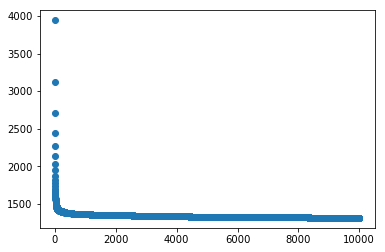

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8230)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

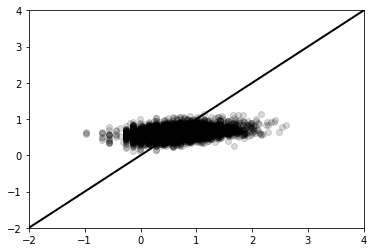

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros_mob_home.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [18]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 33 columns):
DAMAGE_PROPERTY       2748 non-null float64
DURATION_SECONDS      2748 non-null float64
BEGIN_LAT             2748 non-null float64
BEGIN_LON             2748 non-null float64
TOR_LENGTH            2748 non-null float64
TOR_WIDTH             2748 non-null float64
YEAR                  2748 non-null float64
OPEN_WATER_PROP       2748 non-null float64
DEV_OPEN_PROP         2748 non-null float64
DEV_LOW_PROP          2748 non-null float64
DEV_MED_PROP          2748 non-null float64
DEV_HIGH_PROP         2748 non-null float64
DECID_FOREST_PROP     2748 non-null float64
EVERGR_FOREST_PROP    2748 non-null float64
MIXED_FOREST_PROP     2748 non-null float64
SHRUB_SCRUB_PROP      2748 non-null float64
GRASS_LAND_PROP       2748 non-null float64
PASTURE_HAY_PROP      2748 non-null float64
CULT_CROPS_PROP       2748 non-null float64
WOOD_WETLAND_PROP     2748 non-null float64
HERB_WETLAND_

In [19]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 2:]


# Get rid of non-location and non-landcover variables
valid_predictors = valid_predictors.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "YEAR",
                                          "TOR_AREA",
                                          "EXP_INC_AREA",
                                          "DAY_OF_YEAR",
                                          "MONTH_MEAN",
                                          "TIME"],
                                         axis = 1)


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [20]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 475.3816
[torch.FloatTensor of size 1]

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [22]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2748)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

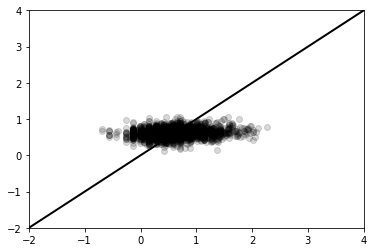

In [23]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.2: Test Set Performance

In [24]:
# Import data
test_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_test_set_no_zeros_mob_home.csv")


# Validation set outcomes
test_outcomes = test_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
test_outcomes_array = test_outcomes.values


# Makes the numpy array into a torch Tensor
test_outcomes_Tensor = torch.from_numpy(test_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
test_outcomes_Tensor = test_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_outcomes_Variable = Variable(test_outcomes_Tensor)

In [25]:
# Validation set predictors
test_predictors = test_df.iloc[:, 2:]


# Get rid of non-location and non-landcover variables
test_predictors = test_predictors.drop(["TOR_LENGTH",
                                        "TOR_WIDTH",
                                        "YEAR",
                                        "TOR_AREA",
                                        "EXP_INC_AREA",
                                        "DAY_OF_YEAR",
                                        "MONTH_MEAN",
                                        "TIME"],
                                       axis = 1)


# Make the validation predictors into a numpy array
test_predictors_array = test_predictors.values


# Makes the numpy array into a torch Tensor
test_predictors_Tensor = torch.from_numpy(test_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
test_predictors_Tensor = test_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_predictors_Variable = Variable(test_predictors_Tensor)

In [26]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 453.5546
[torch.FloatTensor of size 1]

In [27]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

In [28]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
test_outcomes_Variable_resized = test_outcomes_Variable.resize(2699)


# Make the FloatTensor into a numpy.array
test_outcomes_array = test_outcomes_Variable_resized.data.numpy()


# Convert back to native units and scale
test_outcomes_array = test_outcomes_array*5.41747 + 7.67485


# Make the numpy.array into a list
test_outcomes_list = test_outcomes_array.tolist()

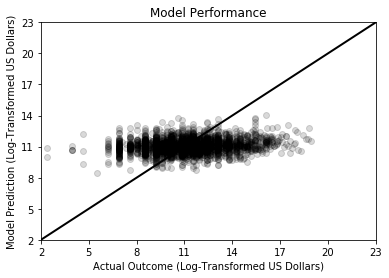

In [29]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [30]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0419  0.7062 -0.1282  0.3222 -0.0718  0.0735 -0.1188 -0.0387  0.1013  0.0027
 0.2160  0.1499 -0.1438 -0.1373  0.0437  0.2759 -0.1353  0.2653  0.0560  0.0248
 0.1750  0.1361 -0.0114  0.1073 -0.3137  0.1549  0.1444  0.0241  0.1893 -0.1355
 0.0620  0.1245 -0.0655 -0.0592 -0.1651  0.2430 -0.0210  0.2809  0.0463  0.2124
 0.1977  0.0472  0.2672  0.2276 -0.2473  0.0298  0.1061  0.0017 -0.4351  0.1765
 0.1594 -0.1079  0.0543 -0.3180  0.4153 -0.2048  0.3289  0.0836  0.0333 -0.2541
 0.0067  0.2268 -0.0214  0.0066 -0.4226 -0.2699  0.1165 -0.3967 -0.3464 -0.0691
-0.1322  0.0322 -0.0796 -0.1507  0.3563  0.0939 -0.1293  0.0481 -0.0316  0.2000
-0.1119  0.0523  0.0384  0.2169  0.2167 -0.1415 -0.0761  0.0005 -0.0985  0.0041
-0.3652 -0.1320  0.0213 -0.1056 -0.1464 -0.1762  0.3864  0.2242  0.0117  0.2122
-0.0271  0.1780 -0.0728  0.3605 -0.1181  0.1091 -0.2032  0.0247  0.2610 -0.0574
 0.1484 -0.0548  0.0519  0.1991  0.0127  0.0184 -0.0453 -0.1869 -0.1499 -0.0918
 

In [31]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.2759  0.3257  0.1779 -0.3350  0.0939  0.1391  0.1788  0.2527  0.1653  0.2678

Columns 10 to 14 
 0.1861  0.2320  0.2036  0.1315 -0.2272
[torch.FloatTensor of size 1x15]

## Round 2: Two-Hidden-Layer Neural Network

In [32]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [33]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 1))

In [34]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

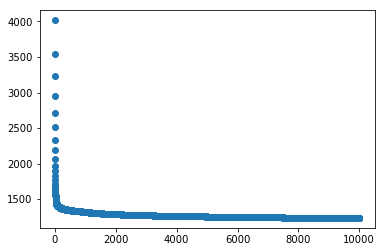

In [35]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [36]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

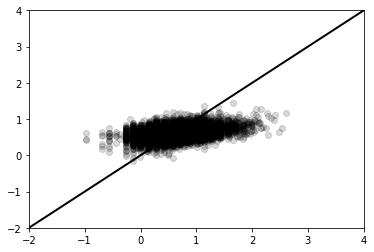

In [37]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [38]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 496.8574
[torch.FloatTensor of size 1]

In [39]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

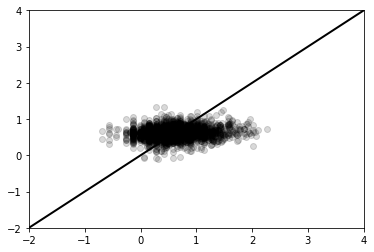

In [40]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.2: Test Set Performance

In [41]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 478.6919
[torch.FloatTensor of size 1]

In [42]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

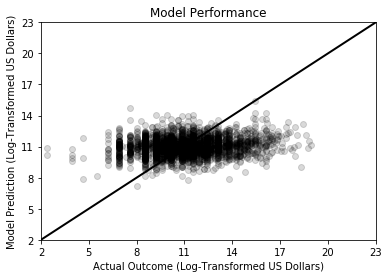

In [43]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [44]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1298 -0.6950 -0.1284 -0.2616  0.0361 -0.4362  0.3446 -0.0838 -0.1302  0.5214
 0.1148 -0.0393  0.0874 -0.4341  0.1567  0.1289  0.1565  0.0629 -0.0800 -0.0962
 0.1381 -0.3016 -0.2013  0.0094 -0.0505 -0.3329  0.1059 -0.3291  0.0303  0.1973
-0.0936 -0.1219 -0.0816  0.1717 -0.0757  0.4178 -0.1230 -0.0214  0.0460  0.0379
 0.1968 -0.4699 -0.0173 -0.0804 -0.0310  0.0626  0.2391  0.2475  0.1228 -0.0656
-0.2273  0.0904 -0.0880  0.2941 -0.2190  0.1114 -0.2398  0.0670  0.0173  0.0610
-0.2386  0.1617 -0.1287 -0.0750 -0.0638  0.1142  0.0466  0.2845 -0.1370  0.2888
 0.1286 -0.0901  0.1211  0.3823  0.2451 -0.1478  0.0355  0.1386 -0.0988 -0.0464
-0.0282  0.2420  0.0123  0.0178 -0.1307  0.2424 -0.1024  0.2147  0.4376  0.1355
 0.0087  0.1328 -0.0854  0.3797 -0.2239 -0.1143 -0.2342 -0.3895  0.0009 -0.1615
 0.3531 -0.1384 -0.1309  0.0873  0.1691  0.0550 -0.0244  0.3392  0.2835 -0.0866
-0.2539  0.0601  0.0790  0.2038  0.3102  0.0294  0.0338  0.0320  0.1184 -0.2056
-

In [45]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.3078  0.0788 -0.3441  0.0176  0.1936  0.5106  0.3511 -0.2856 -0.7098  0.2320
-0.0843  0.1964 -0.4717  0.2698  0.1474 -0.2778  0.2348  0.0952  0.0959  0.3945
 0.2150  0.1728 -0.6815  0.3507  0.0513 -0.3470 -0.0197  0.1910  0.1118  0.3797
-0.2270  0.4178  0.5148 -0.4646 -0.8005 -0.6048  0.3529  0.2774 -0.1517  0.0749
 0.2765  0.2132 -0.2638  0.1440  0.2785 -0.2536 -0.0415  0.0533  0.2462  0.2229
 0.5524  0.2198 -0.2745  0.0072  0.0082 -0.1257  0.1288  0.1270  0.0444 -0.0621
-0.1125 -0.1346 -0.0774  0.0722  0.2776 -0.0943 -0.5508 -0.1232  0.1110 -0.4369
 0.2333  0.2890 -0.2090 -0.5140 -1.0116 -0.1489  0.3354  0.1813 -0.0096 -0.4847
 0.0533 -0.5814 -0.1198 -0.5554  0.1794  0.1725 -0.2851  0.0206  0.1169  0.0916
 0.1428  0.0498  0.4100  0.0453 -0.0087 -0.0459 -0.0447  0.1599 -0.7771  0.1153

Columns 10 to 14 
 0.2271 -0.1712 -0.4373  0.0919 -0.0851
 0.3136 -0.5143  0.0438  0.2019  0.2708
 0.3481  0.0699 -0.1076  0.3070  0.1229
 0.1399 -0.5127  0.018

In [46]:
model[(4)].weight

Parameter containing:
-0.8435  0.3317  0.2770  0.4307  0.2105  0.3769 -0.7021 -1.1929 -0.8757 -0.3875
[torch.FloatTensor of size 1x10]

## Round 3: Three-Hidden-Layer Neural Network

In [47]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [48]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 1))

In [49]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

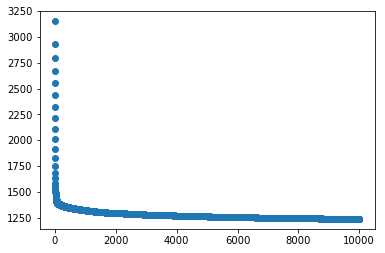

In [50]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [51]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

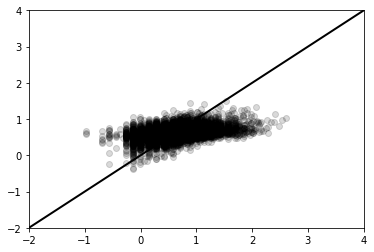

In [52]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [53]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 503.7550
[torch.FloatTensor of size 1]

In [54]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

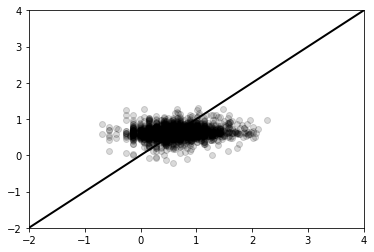

In [55]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.2: Test Set Performance

In [56]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 487.0051
[torch.FloatTensor of size 1]

In [57]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

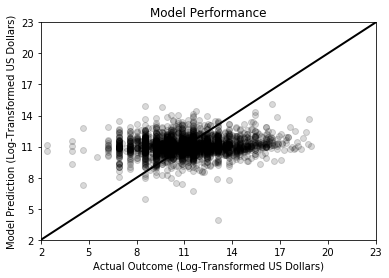

In [58]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [59]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1960 -0.5081 -0.0309  0.0381 -0.2655 -0.1382  0.4212 -0.1041 -0.2427  0.0285
 0.0617  0.1926 -0.0743  0.1503 -0.1919  0.1038 -0.4216  0.0226  0.1106 -0.1405
 0.4931 -0.1089 -0.2791  0.0993  0.2186  0.2651  0.0014 -0.4955 -0.2358 -0.1601
 0.3832 -0.0418 -0.2637  0.0778  0.1625 -0.0845  0.5328 -0.0788 -0.0447 -0.1489
 0.1026 -0.1637  0.1929  0.0899  0.0392 -0.4563  0.1903  0.2772  0.0243  0.1252
 0.2377  0.0597  0.1397 -0.0744 -0.1147  0.2509 -0.5292  0.0265 -0.2430 -0.1579
-0.1332 -0.4073  0.0487  0.3123  0.3405 -0.0659 -0.3444 -0.2395  0.4103 -0.0989
-0.6013 -0.2880 -0.2397  0.0058 -0.0518 -0.1209  0.0598  0.5373  0.1947  0.1687
 0.0962 -0.0268 -0.0605 -0.2364  0.2636  0.2752  0.2449  0.3045  0.6511  0.0403
 0.1658 -0.1941  0.1779 -0.3185 -0.1418 -0.0630  0.3556 -0.1451 -0.0839 -0.0460
 0.0608 -0.2716  0.0964  0.0083  0.1443  0.0232 -0.1951  0.2207  0.0274 -0.2134
-0.0351  0.1313  0.1641  0.0903 -0.2415 -0.2450 -0.1162 -0.1070 -0.2023 -0.0824
 

In [60]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.7562 -0.3892  0.2720  0.3639  0.4959 -0.0005 -0.0978  0.1746  0.2462  0.1246
 0.1200  0.1978  0.2415  0.2675 -0.0046 -0.0717  0.2381 -0.1456 -0.0505  0.0966
-0.5550 -0.1403  0.4143 -0.1603  0.2326  0.5938 -0.2486  0.5888  0.2870  0.2362
 0.0699  0.2725  0.0797 -0.0555  0.2436 -0.0280  0.1920  0.3985 -0.2325  0.3120
 0.1481  0.0189  0.3764  0.5934  0.1659  0.1828  0.9202  0.1005  0.5503  0.3487
-0.4141  0.0468 -0.0906  0.3129 -0.1357  0.3461 -0.2069 -0.1829  0.2006  0.1022
-0.0448  0.2362  0.0429 -0.2938 -0.1886  0.0780  0.4179  0.1357 -0.1746  0.0771
 0.0233 -0.4272 -1.1080 -0.2352  0.2239  0.0521  0.4036  0.1677 -0.5359  0.3198
 0.1229  0.1642  0.1867  0.2442 -0.0502 -0.3081  0.3359  0.0788 -0.1375  0.2309
 0.1901 -0.4090  0.1138  0.1363  0.4288  0.1027 -0.0584  0.0232  0.2046  0.4430

Columns 10 to 14 
 0.0306  0.0427  0.0239 -0.0060  0.0031
 0.2912  0.0573 -0.2955 -0.1619  0.3056
 0.3125 -0.2230 -0.1219  0.0240 -0.0069
-0.1358  0.1089 -0.527

In [61]:
model[(4)].weight

Parameter containing:
 0.6572  0.3844  0.1226  0.1867  0.2682  0.3720 -0.3067 -0.3281  0.2320  0.2219
-0.1099  0.1575  0.3038 -0.1870 -0.1881 -0.2631 -0.2796  0.0763 -0.2025  0.2056
-0.5651 -0.1785  0.4146 -0.5121  0.4312  0.0521  0.1258  0.4678 -0.1425 -0.2926
 0.5791 -0.0441 -0.2923  0.0932 -0.4289 -0.8607  0.5092  0.1768  0.0892 -0.4700
 0.5469  0.2571 -0.5578 -0.7988  0.1067  0.0874  0.1093  1.2447 -0.2219  0.1161
 0.2535 -0.0440  0.2830  0.2003  0.6181  0.1926 -0.7175 -0.2715  0.0800  0.5680
 0.2694 -0.2604  0.3212 -0.4505 -0.0246  0.2419  0.9265  0.1509 -0.3777  0.2387
[torch.FloatTensor of size 7x10]

In [62]:
model[(6)].weight

Parameter containing:
 0.1599  0.3399 -0.2784 -1.5232 -0.9269  0.2396 -1.9524
[torch.FloatTensor of size 1x7]

## Round 4: Four-Hidden-Layer Neural Network

In [63]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [64]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 1))

In [65]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

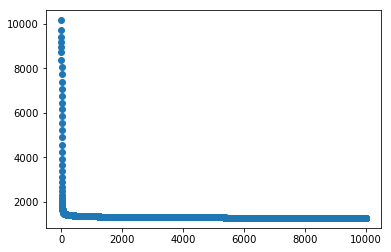

In [66]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [67]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

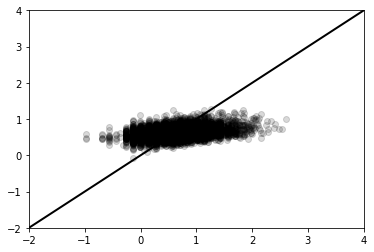

In [68]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [69]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 476.8360
[torch.FloatTensor of size 1]

In [70]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

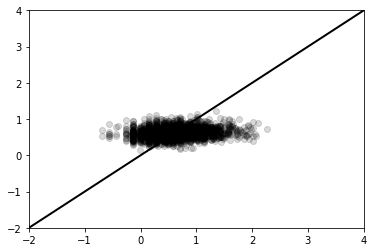

In [71]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.2: Test Set Performance

In [72]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 460.7478
[torch.FloatTensor of size 1]

In [73]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

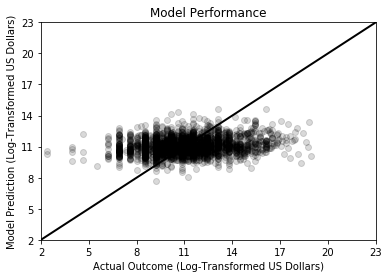

In [74]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [75]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1673  0.1791 -0.0718  0.0618  0.1906  0.3096  0.2002  0.3479  0.1468  0.0230
 0.0654 -0.0342  0.1233  0.0924  0.0712 -0.1885  0.1878  0.2942  0.1611  0.0409
 0.0774  0.1465 -0.0982 -0.0481  0.2579  0.0259  0.0966 -0.0372 -0.1113 -0.0719
 0.2250  0.1552  0.0502  0.2983 -0.2345 -0.3265  0.1303 -0.3391  0.0226 -0.2751
-0.0511  0.1060  0.2761 -0.0791  0.0881 -0.0253  0.0415 -0.2943 -0.4062 -0.2151
 0.2062 -0.0406  0.0011  0.3561  0.1114 -0.1513 -0.1184  0.2328 -0.0854 -0.1618
-0.1070  0.1951 -0.0584  0.1208  0.1828 -0.1312  0.0609  0.2218  0.3525  0.0646
-0.0344 -0.4149  0.0752 -0.1416 -0.0353 -0.1020 -0.0992 -0.0843 -0.2514  0.0838
-0.0006 -0.1641  0.0293  0.0208  0.0132 -0.0012 -0.0719  0.0372 -0.1018 -0.0965
-0.2117  0.2950 -0.0752 -0.2254 -0.3798 -0.1762 -0.2117  0.1132 -0.0633  0.1726
-0.0729  0.0945 -0.1359 -0.1314 -0.1313  0.3294 -0.3911  0.1585  0.2594  0.0341
-0.1323  0.0458 -0.1257 -0.3499 -0.1912 -0.0301  0.3631  0.0079 -0.1847  0.0459
-

In [76]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.3090 -0.0205  0.1963 -0.0504  0.4887 -0.2708  0.2697 -0.5637  0.4485 -0.3132
-0.0058  0.2053 -0.0120  0.4270 -0.3175  0.0568 -0.0997 -0.2723 -0.0225  0.1421
 0.0666  0.3262 -0.0412  0.0576  0.0858 -0.1194  0.1036  0.0305 -0.0747  0.0805
 0.2373 -0.0985  0.0166  0.2006  0.3015 -0.0348 -0.2592 -0.1265  0.2486 -0.2339
 0.1518  0.0878  0.1472  0.2753  0.0094  0.1683  0.0130  0.1174  0.0883 -0.0525
 0.2570  0.3193  0.3245  0.2281  0.2801  0.2259  0.0655 -0.1085  0.0041 -0.1934
 0.3198  0.2156 -0.1313 -0.0175  0.0490  0.4215 -0.3181 -0.2936  0.0315 -0.5749
-0.4366 -0.4389  0.0818 -0.2593 -0.0598 -0.6091 -0.1021  0.0835 -0.4453 -0.5019
-0.0927 -0.0589 -0.2322 -0.1531 -0.1198  0.1187 -0.1096 -0.0074 -0.1732  0.0640
-0.0918  0.1319  0.3616 -0.1171 -0.0050 -0.1182 -0.2258  0.3385  0.3083 -0.3986

Columns 10 to 14 
 0.4296 -0.1761 -0.9489 -0.2832  0.2612
 0.4196 -0.5160  0.5822  0.0733  0.1667
 0.2040  0.0360 -0.1914  0.3522  0.1407
-0.0502 -0.0874 -0.222

In [77]:
model[(4)].weight

Parameter containing:
 0.1926  0.1249 -0.0983 -0.2858  0.0217 -0.1842  0.1457  0.1252 -0.0905  0.2334
 0.9659  0.5281  0.1580  0.1791 -0.1429  0.3960  0.4672 -0.8705 -0.2282  0.0503
 1.3055  0.2601 -0.1606  0.2801  0.0243  0.1923  0.5946 -1.0676 -0.0273  0.3807
 1.2200  0.0712  0.4395  0.3708 -0.0671  0.2550  0.3382 -1.0393  0.0820  0.1398
-0.1864 -0.1791 -0.0500 -0.1180 -0.1015 -0.2122 -0.0599  0.2640 -0.1337  0.0280
 0.9669  0.0151  0.1778 -0.0662  0.3950  0.0748  0.0970 -1.3415 -0.2205  0.4000
 1.6411  0.4564  0.2250  0.1798 -0.2144  0.3227  1.3126 -1.3237 -0.1240  0.2287
[torch.FloatTensor of size 7x10]

In [78]:
model[(6)].weight

Parameter containing:
-0.1153  0.0580 -0.0013 -0.1609 -0.1777 -0.3652  0.0877
 0.2336  0.3279  0.5923  0.2272 -0.2002  0.3500  0.3040
 0.1042 -0.3285 -0.1230  0.0075 -0.2758 -0.3471 -0.1968
 0.1256 -0.0911  0.0642 -0.1203  0.1073 -0.1832 -0.0161
 0.3627  0.4570  0.3033 -0.1608 -0.2821 -0.3902 -0.1025
[torch.FloatTensor of size 5x7]

In [79]:
model[(8)].weight

Parameter containing:
-0.0936  0.4615  0.4415 -0.1564  1.0017
[torch.FloatTensor of size 1x5]

## Round 5: Five-Hidden-Layer Neural Network

In [80]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [81]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [82]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

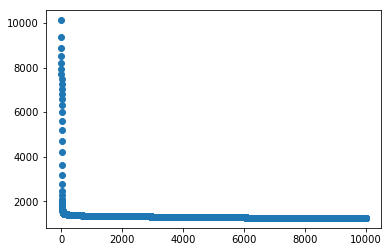

In [83]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [84]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

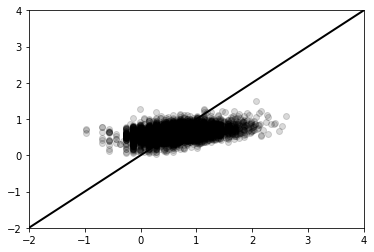

In [85]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1: Validation Set Performance

In [86]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 497.0159
[torch.FloatTensor of size 1]

In [87]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

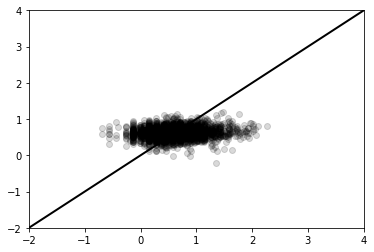

In [88]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.2: Test Set Performance

In [89]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 481.2932
[torch.FloatTensor of size 1]

In [90]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

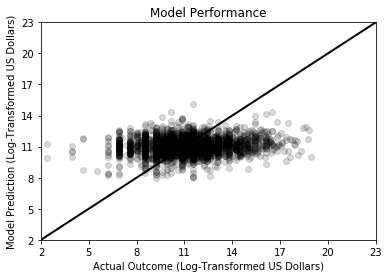

In [91]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [92]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.2482 -0.1433  0.0760 -0.0504  0.1623 -0.3419  0.2868 -0.2262 -0.3167  0.1251
 0.0896 -0.0581  0.1000 -0.2748  0.4140 -0.2197  0.0050 -0.0434  0.0897  0.0483
-0.1294 -0.0846 -0.0984  0.1066  0.1785  0.0841  0.0138  0.2057 -0.0148  0.0661
 0.1649 -0.5769 -0.0936  0.1013  0.1617 -0.0675  0.0597 -0.0960 -0.1021 -0.1000
 0.1980 -0.1005  0.1169 -0.2311 -0.1315  0.0984  0.3087 -0.2414  0.0682 -0.0536
-0.0535 -0.0884 -0.0328 -0.0189  0.0003  0.1469 -0.0135 -0.1191 -0.1933 -0.1568
-0.3012  0.2158  0.1264  0.5300 -0.2943 -0.4492  0.1406  0.1080 -0.0374  0.0225
 0.2821  0.1636 -0.1804  0.1541 -0.1071  0.1670 -0.0874  0.2096  0.1004 -0.0648
 0.1437 -0.1097  0.0158  0.2770  0.0092 -0.2723 -0.0799  0.1192  0.0054 -0.1652
-0.2724  0.3242  0.1035  0.3325 -0.0618 -0.0646  0.1745  0.3913  0.1701  0.1046
 0.0461 -0.0348  0.1120 -0.2435  0.3142  0.1906  0.2596  0.3454  0.0428  0.0660
-0.0077 -0.1396 -0.2624  0.1884  0.3189  0.0489  0.1575  0.4033 -0.0326 -0.0050
 

In [93]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.3284  0.1126 -0.1451 -0.6764  0.2975 -0.3391  0.2314  0.0080  0.1266 -0.2524
-0.0045 -0.1531 -0.1087  0.1032 -0.2299 -0.3318  0.5073 -0.1401 -0.4672 -0.2608
 0.0918 -0.0234  0.2838 -0.9364 -0.2492 -0.2010  0.1812 -0.1231  0.0232 -0.2459
-0.0284  0.2812 -0.1898  0.0239  0.0708  0.1154  0.2194 -0.2808 -0.1561 -0.2736
 0.2996 -0.1035  0.2035 -0.1698 -0.2496 -0.0457  0.2405 -0.1762  0.2616 -0.3963
 0.0649  0.1783  0.0373 -0.2050  0.0142 -0.5605  0.4474  0.4085  0.2326 -0.1551
 0.3501  0.1693  0.0927 -0.1564  0.2926  0.0391  0.0886  0.0770 -0.1736  0.1146
 0.0952 -0.1637  0.2781 -0.1235  0.3788 -0.6668 -0.4763 -0.7785  0.2173  0.3892
 0.3412 -0.1981  0.3668  0.1523  0.3702  0.0799  0.0694 -0.2444  0.3486 -0.0293
 0.0132  0.3233  0.0811 -0.2671  0.1266  0.1808  0.2827  0.3029  0.2967  0.0633

Columns 10 to 14 
 0.3503  0.0081  0.2489  0.1346  0.2133
 0.3209 -0.1508  0.0934  0.1299 -0.4905
 0.3449 -1.9759  0.0794 -0.2976  0.3705
 0.2029 -0.0567  0.246

In [94]:
model[(4)].weight

Parameter containing:
 0.2603 -0.1081 -0.9893  0.0497  0.5236 -0.0282  0.3387 -0.0265  0.3562 -0.0797
-0.2156 -0.2025  0.0888  0.0146 -0.0997 -0.1127  0.0285  0.0384 -0.2919 -0.1276
 0.1474 -1.7915  1.3499  0.4836  0.2283  0.4632 -0.2785  0.5997  0.3021 -0.5255
 0.2563 -0.3342 -0.8423  0.0552  0.3182 -0.2647 -0.1119 -0.2054  0.4183  0.2995
 0.5810  0.1549  0.2250 -0.3965  0.2724  0.3524  0.2672  0.0016 -0.1660  0.2934
 0.4362 -0.5126  0.0320  0.1901  0.4175  0.2916  0.2938 -0.1301  0.1635  0.2707
-0.1619  0.0340 -0.2798 -0.1763  0.0135 -0.2355 -0.2677 -0.0032 -0.2118  0.0490
[torch.FloatTensor of size 7x10]

In [95]:
model[(6)].weight

Parameter containing:
-0.5423  0.1428  0.3893  0.2492 -0.1338  0.2971 -0.0627
 0.2763 -0.3590 -0.8397  0.2807  0.0459  0.3094  0.2886
-0.0158  0.1161  0.2495 -0.3586 -0.0498  0.0465  0.1513
 0.1716  0.1166 -1.3496  0.4141 -0.2028  0.1761 -0.2770
 0.5017  0.3300 -1.1829  0.4105  0.4775  0.3407  0.2988
[torch.FloatTensor of size 5x7]

In [96]:
model[(8)].weight

Parameter containing:
-0.4056 -0.1260 -0.3516 -0.0155 -0.2798
-0.4261  0.5282  0.3708  0.5889  0.2919
 0.4801 -0.0004  0.3911 -0.6251  0.0620
[torch.FloatTensor of size 3x5]

In [97]:
model[(10)].weight

Parameter containing:
 0.4988  0.6728 -0.3604
[torch.FloatTensor of size 1x3]

## Round 6: Six-Hidden-Layer Neural Network

In [98]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [99]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [100]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

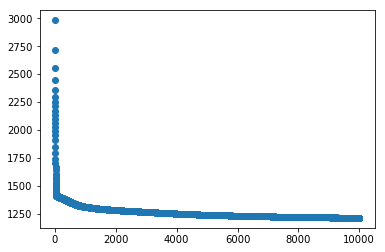

In [101]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [102]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

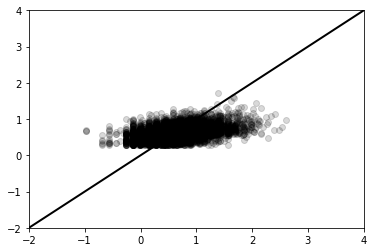

In [103]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [104]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 504.3564
[torch.FloatTensor of size 1]

In [105]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

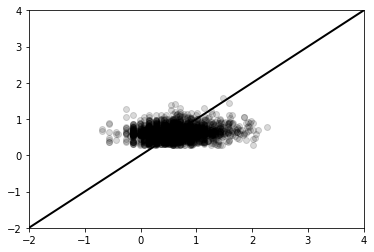

In [106]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.2: Test Set Performance

In [107]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 495.3851
[torch.FloatTensor of size 1]

In [108]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

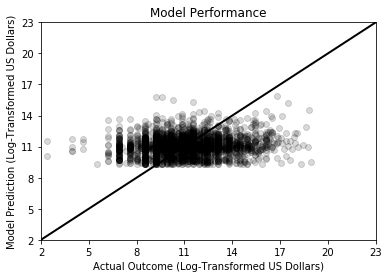

In [109]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [110]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1279 -0.1316  0.1077 -0.0434  0.0478  0.2077 -0.1906  0.3552  0.0983  0.3972
-0.0157 -0.6811 -0.0066  0.2266  0.0719 -0.0476 -0.0573 -0.1472 -0.0716  0.0857
 0.2533  0.0981 -0.1515  0.3350  0.1086  0.1904  0.2443  0.1132 -0.0351  0.2120
-0.2252 -0.1289  0.2582  0.2440  0.3263 -0.1367  0.3547 -0.0141 -0.0644 -0.1497
-0.0597 -0.0204 -0.0887 -0.1554  0.2526  0.1352  0.3646  0.0657 -0.1387  0.1072
 0.0927 -0.0375 -0.0946  0.5085 -0.3284 -0.7166  0.3743 -0.0559 -0.1289 -0.0250
-0.5336  0.1794 -0.0789 -0.1873  0.0606  0.2503  0.2080  0.5291  0.3173 -0.0717
 0.5316 -0.1717 -0.0133  0.1221  0.1303  0.1252  0.0634  0.0901  0.4316 -0.0451
-0.1346 -0.0215 -0.2643  0.2143  0.3359 -0.1259 -0.1974  0.0462  0.2730 -0.2160
 0.5193  0.2710  0.4537 -0.2726  0.2754 -0.0909 -0.2655 -0.1603 -0.0695 -0.1024
 0.2695  0.4287  0.2125 -0.1622  0.0934  0.1885  0.5564  0.2557  0.2208 -0.3091
-0.2754  0.0720 -0.1920 -0.1343  0.1862 -0.0598 -0.0275 -0.0323 -0.3297  0.2369
-

In [111]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.3214 -0.1105  0.2459  0.3708  0.1784  0.6954 -0.0485  0.2058  0.1402  0.2203
 0.4355 -0.4266  0.1657  0.3220 -0.0988  0.6624  0.4358  0.0849 -0.1081  0.3189
 0.6566 -0.5610  0.2899  0.4729  0.0290 -0.0890  0.1210  0.1695 -0.1691 -0.0248
-0.1379  0.0780  0.0923  0.5501  0.3649  0.3203  0.0761  0.0112 -0.1463  0.2965
-0.1520 -0.3624  0.3217  0.3975  0.6069  0.7383  0.0318  0.2852  0.2893 -0.1429
 0.7012 -0.7150 -0.5647 -0.0839  0.4043  0.1151  0.0149  0.4943  0.0878 -0.4080
-0.1029  0.6043  0.2159 -0.3308  0.0413  0.2677  0.4147 -0.0871 -0.5016 -0.7274
 0.0552 -0.5805 -0.1537 -0.3619  0.2569 -0.1636  0.1997  0.2145 -0.1880  0.2055
 0.0896 -0.4290 -0.3911  0.6493 -0.5722 -0.8642 -0.8284  0.3805 -0.3368 -0.2914
-0.5668  0.3004  0.4556 -0.3450 -0.7011 -0.1979  0.0654 -0.1925 -0.0268 -0.6342

Columns 10 to 14 
-0.1929 -0.2562  0.2516  0.2934 -0.0203
 0.0644 -0.4008 -0.0035 -0.7674  0.0491
 0.2753  0.1620  0.3076  0.1582 -0.1167
 0.2032  0.2487 -0.063

In [112]:
model[(4)].weight

Parameter containing:
-0.0742 -0.4186  0.3836  0.3354  0.2244  0.5719 -1.6149 -0.5351 -1.4731 -0.6399
 0.0005  0.4707  0.3611  0.2961  0.0665  0.1290 -0.8235 -0.0536 -0.6426 -0.3359
-0.1129 -0.2667  0.0735  0.4215 -0.1070  0.7817 -2.1299 -0.5733 -0.4248 -0.1594
 0.1269 -0.0912  0.4020  0.1942  0.0129  1.1850 -0.9446 -0.5161 -1.1369 -0.2962
 0.4115  0.1255  0.4712  0.0441 -0.2257  0.6267 -0.0855 -0.5724 -1.1669 -0.3587
-0.4297  0.2456  0.1671 -0.0845 -0.2450 -0.2313  0.0995  0.2143  1.5514  0.5372
-0.7526  0.4868  0.2369 -0.1586 -0.6426 -0.1561  0.2053  0.5768 -0.8579 -0.2616
[torch.FloatTensor of size 7x10]

In [113]:
model[(6)].weight

Parameter containing:
 0.9639  0.1010  0.7731  0.5412  0.4552 -0.9052 -1.4483
 0.3351  0.3276  0.3144  0.1051 -0.1332 -0.1599 -0.2729
 0.6161  0.0630 -0.1952 -0.0963 -0.3798 -0.3142  0.6135
-2.3853  0.6930 -0.7265 -0.9095 -1.0483 -1.8218 -1.2772
 0.3935  0.2191  0.0052  0.0471  0.1027  0.0703 -0.5272
[torch.FloatTensor of size 5x7]

In [114]:
model[(8)].weight

Parameter containing:
 0.7259  0.5290 -0.8239  3.3201  0.1426
-1.2032 -0.1119  0.4990 -2.1696 -0.0872
 0.1014 -0.3042  0.2563  3.4865 -0.2179
[torch.FloatTensor of size 3x5]

In [115]:
model[(10)].weight

Parameter containing:
 0.5406 -0.7570  0.3304
-0.3065 -0.5818  0.0734
[torch.FloatTensor of size 2x3]

In [116]:
model[(12)].weight

Parameter containing:
 0.4992 -0.6003
[torch.FloatTensor of size 1x2]

## Round 7: Linear Regression

In [117]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [118]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(23, 1))

In [119]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

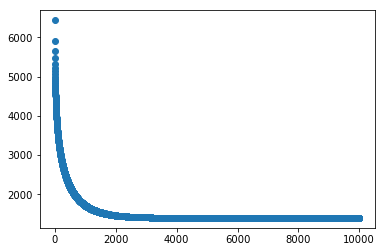

In [120]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [121]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

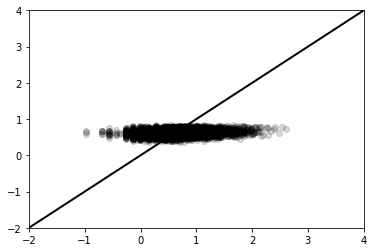

In [122]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [123]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 470.5267
[torch.FloatTensor of size 1]

In [124]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

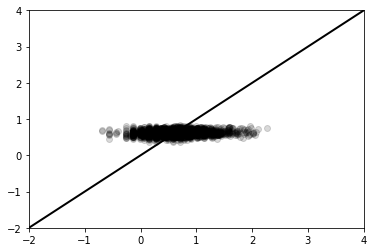

In [125]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.2: Test Set Performance

In [126]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 453.3673
[torch.FloatTensor of size 1]

In [127]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

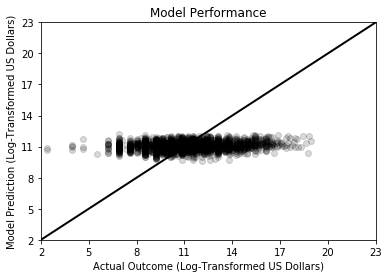

In [128]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [129]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
1.00000e-02 *
  2.9148  0.8951  0.2619 -2.4929  1.2511 -2.8276  2.4948  3.7100  2.3891 -0.9014

Columns 10 to 19 
1.00000e-02 *
 -1.8553  0.4658 -0.9970  1.4898  0.9616 -0.9239  0.1263  0.0030  4.3835 -3.4272

Columns 20 to 22 
1.00000e-02 *
  2.0882 -1.7937  2.6503
[torch.FloatTensor of size 1x23]